In [30]:
import matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError

In [57]:
df_enso = pd.read_csv(r"C:\Users\bhanu\OneDrive\Desktop\project\ENSO EVENTS PREDICTION\ENSO.csv", parse_dates=[0])
df_enso.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [58]:
# data information (columns, rows, data tyype, null values etc) 
df_enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          901 non-null    datetime64[ns]
 1   Year                          901 non-null    int64         
 2   Month                         901 non-null    object        
 3   Global Temperature Anomalies  882 non-null    float64       
 4   Nino 1+2 SST                  514 non-null    float64       
 5   Nino 1+2 SST Anomalies        514 non-null    float64       
 6   Nino 3 SST                    514 non-null    float64       
 7   Nino 3 SST Anomalies          514 non-null    float64       
 8   Nino 3.4 SST                  514 non-null    float64       
 9   Nino 3.4 SST Anomalies        514 non-null    float64       
 10  Nino 4 SST                    514 non-null    float64       
 11  Nino 4 SST Anomalies          51

In [59]:
# statistics summary
df_enso.describe()

,Date,Year,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI
count,901,901.000000,882.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,875.000000,882.000000,590.000000,886.000000,550.000000,901.000000
mean,1987-07-02 01:13:31.098779136,1987.042175,0.337971,23.262121,-0.020195,25.995097,-0.032490,27.046634,-0.048191,28.483619,-0.070311,-0.418517,-0.109002,0.044407,0.147404,-0.057818,0.011643
min,1950-01-01 00:00:00,1950.000000,-0.370000,19.060000,-1.900000,23.380000,-2.160000,24.560000,-2.220000,26.360000,-1.870000,-3.376000,-3.650000,-2.800000,-3.600000,-2.500000,-2.000000
25%,1968-10-01 00:00:00,1968.000000,0.060000,21.225000,-0.727500,25.000000,-0.647500,26.350000,-0.657500,28.012500,-0.567500,-1.458500,-0.787500,-0.600000,-0.400000,-0.775000,-0.600000
50%,1987-07-01 00:00:00,1987.000000,0.300000,23.195000,-0.235000,25.970000,-0.130000,27.075000,-0.090000,28.585000,0.010000,-0.497000,-0.080000,0.100000,0.200000,-0.100000,-0.100000
75%,2006-04-01 00:00:00,2006.000000,0.610000,25.230000,0.465000,26.985000,0.467500,27.727500,0.460000,29.010000,0.400000,0.384500,0.600000,0.700000,0.800000,0.500000,0.500000
max,2025-01-01 00:00:00,2025.000000,1.340000,28.510000,4.030000,28.810000,3.070000,29.540000,2.720000,30.220000,1.550000,4.227000,2.870000,2.300000,2.900000,2.700000,2.600000
std,NaN,21.685694,0.345478,2.323471,1.073435,1.238659,0.876774,0.953798,0.846408,0.694441,0.651094,1.361371,1.034818,0.972872,0.937414,0.980132,0.839562


In [60]:
# missing values
df_enso.isna().sum(axis=0)

Date                              0
Year                              0
Month                             0
Global Temperature Anomalies     19
Nino 1+2 SST                    387
Nino 1+2 SST Anomalies          387
Nino 3 SST                      387
Nino 3 SST Anomalies            387
Nino 3.4 SST                    387
Nino 3.4 SST Anomalies          387
Nino 4 SST                      387
Nino 4 SST Anomalies            387
TNI                              26
PNA                              19
OLR                             311
SOI                              15
Season (2-Month)                 19
MEI.v2                          351
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              0
dtype: int64

In [61]:
# set index
df_enso.set_index('Date', inplace = True)
df_enso.head(5)

,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


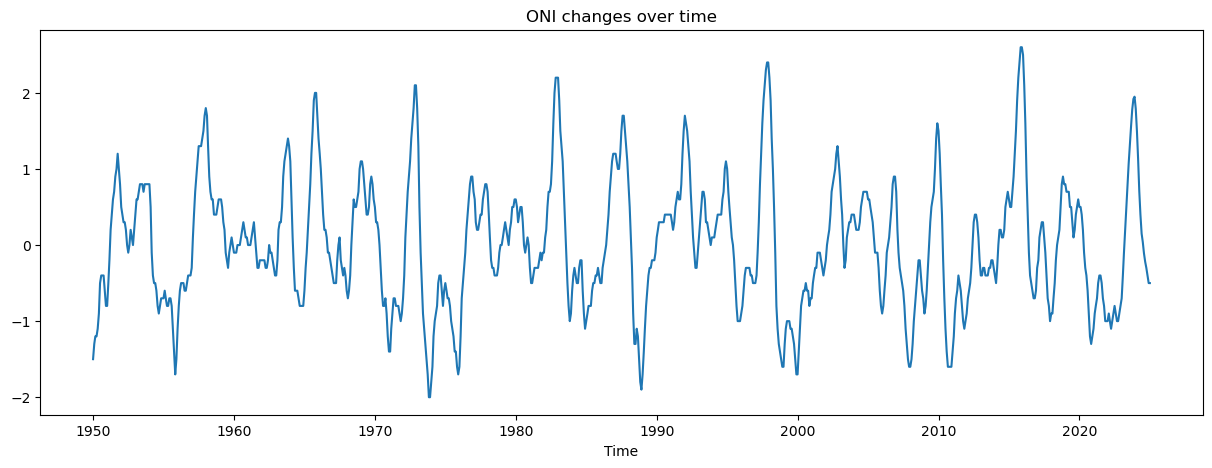

In [62]:
# ONI time series
plt.figure(figsize=(15,5))
plt.plot(df_enso.ONI)
plt.title('ONI changes over time')
plt.xlabel('Time')
plt.show()

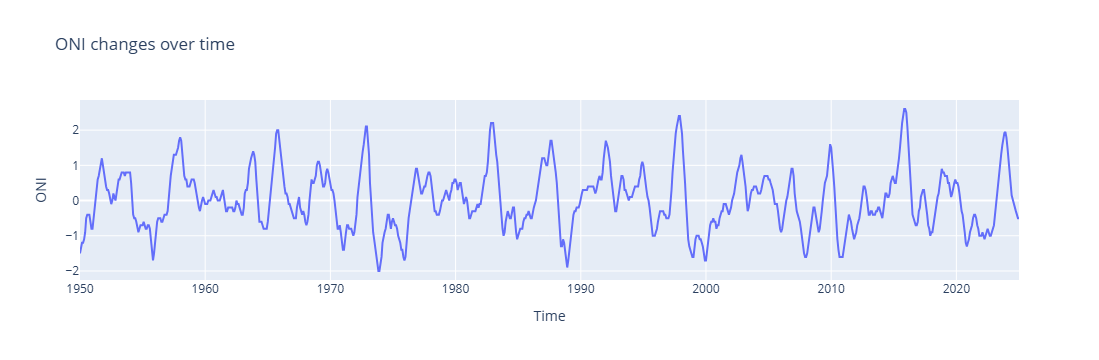

In [64]:
# ONI interactive time series
plot = px.line(data_frame=df_enso, y='ONI', labels={'Date':'Time'},
               title='ONI changes over time')
plot.show()

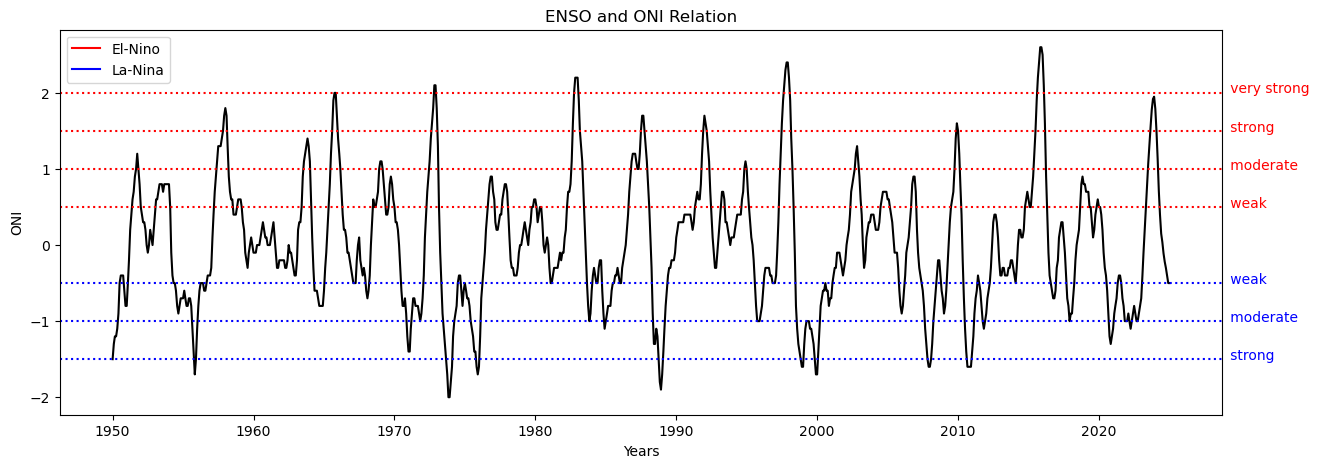

In [38]:
# ONI and ENSO relation

plt.figure(figsize=(15, 5))

# convert dates to numbers to get x-axis range
x = matplotlib.dates.date2num(df_enso.index)

# plot Year and ONI
plt.plot(df_enso.ONI, color='black')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.title('ENSO and ONI Relation')

# add horizontal lines and labels to define ENSO phase and intensity

plt.axhline(y=2, color='r', linestyle=':')
plt.text(x=x[-1], y=2, color='red', s='              very strong')

plt.axhline(y=1.5, color='r', linestyle=':')
plt.text(x=x[-1], y=1.5, color='red', s='              strong')

plt.axhline(y=1, color='r', linestyle=':')
plt.text(x[-1], 1, color='r', s='              moderate')

plt.axhline(y=0.5, color='r', linestyle=':')
plt.text(x[-1], 0.5, color='r', s='              weak')

plt.axhline(y=-0.5, color='b', linestyle=':')
plt.text(x[-1], -0.5, color='b', s='              weak')

plt.axhline(y=-1, color='b', linestyle=':')
plt.text(x[-1], -1, color='b', s='              moderate')

plt.axhline(y=-1.5, color='b', linestyle=':')
plt.text(x[-1], -1.5, color='b', s='              strong')

# custom legends
line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
plt.legend(handles=[line_red, line_blue])

plt.show()

In [39]:
# missing values in ONI
df_enso.ONI.isna().sum(axis=0)

0

In [40]:
# function to transform time series data into supervised learning data
# the transformation is necessary to get input (x) and output (y) sequences
# this function can be used for univariate, multivariate, one-step, and multi-step forecasting

# in one-step, n_in and n_out = 1
# in multi-step, n_in and n_out > 1
# in univariate, the number of variables/columns = 1
# in multivariate, the number of variables/columns > 1

# there are two types of multivariate forecasting i.e whether you want to forecast all input variables or one of them
# if you want to predict one of the input variables, make it the last column of the dataframe 


def series_to_supervised(data, n_in=1, n_out=1, n_vars=1, forecast_all=True, 
                         dropnan=True):
    """
    Frame a time series as a supervised learning dataset
    Parameters:
        data: Sequence of observations, type = dataframe
        n_in: prior timesteps or Number of lag observations as input (x)
        n_out: next timesteps or Number of ahead observations as output (y)
        n_vars: number of variables or number of columns
        forecast_all: to forecast all or one variable
        dropnan: Boolean whether or not to drop rows with NaN values
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    cols, names = list(), list()
    
    if n_vars == 1:    # univariate
        # input sequence or previous timesteps (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names.append(f'var1 (t-{i})')
        # current time steps (t)
        cols.append(data)
        names.append('var1 (t)')
        # forecast sequence or next timesteps (t+1, ... t+n)
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names.append(f'var1 (t+{i})')
    elif forecast_all:    # mutlivariate type 1
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data)
        names += [f'var{j+1} (t)' for j in range(n_vars)]
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names += [f'var{j+1} (t+{i})'for j in range(n_vars)]
    else:    # multivariate type 2
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data.iloc[:, -1])
        names.append('VAR (t)')
        for i in range(1, n_out):
            cols.append(data.shift(-i).iloc[:,-1])
            names.append(f'VAR (t+{i})')
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [41]:
# specify the size of the sliding window (n_lag, n_ahead)
# use the ONI of the previous time steps (e.g. previous 12 months) to predict the ONI of the next time steps (e.g. next 2 months)

n_in = 12
n_out = 3

In [42]:
# timesteps & features
n_steps = n_in                  
n_features = 1   # we are using only one feature/variable i.e oni 

In [43]:
# transform data to get input (x) and output (y) 
# x = enso indicators, y = ONI

df_reframed = series_to_supervised(df_enso['ONI'], n_in, n_out, n_features)
df_reframed

,var1 (t-12),var1 (t-11),var1 (t-10),var1 (t-9),var1 (t-8),var1 (t-7),var1 (t-6),var1 (t-5),var1 (t-4),var1 (t-3),var1 (t-2),var1 (t-1),var1 (t),var1 (t+1),var1 (t+2)
Date,,,,,,,,,,,,,,,
1951-01-01,-1.50,-1.30,-1.20,-1.20,-1.10,-0.90,-0.50,-0.40,-0.40,-0.40,-0.60,-0.80,-0.80,-0.50,-0.20
1951-02-01,-1.30,-1.20,-1.20,-1.10,-0.90,-0.50,-0.40,-0.40,-0.40,-0.60,-0.80,-0.80,-0.50,-0.20,0.20
1951-03-01,-1.20,-1.20,-1.10,-0.90,-0.50,-0.40,-0.40,-0.40,-0.60,-0.80,-0.80,-0.50,-0.20,0.20,0.40
1951-04-01,-1.20,-1.10,-0.90,-0.50,-0.40,-0.40,-0.40,-0.60,-0.80,-0.80,-0.50,-0.20,0.20,0.40,0.60
1951-05-01,-1.10,-0.90,-0.50,-0.40,-0.40,-0.40,-0.60,-0.80,-0.80,-0.50,-0.20,0.20,0.40,0.60,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,1.07,1.32,1.56,1.78,1.92,1.95,1.79,1.49,1.14,0.71,0.40,0.15,0.04,-0.11,-0.22
2024-08-01,1.32,1.56,1.78,1.92,1.95,1.79,1.49,1.14,0.71,0.40,0.15,0.04,-0.11,-0.22,-0.30
2024-09-01,1.56,1.78,1.92,1.95,1.79,1.49,1.14,0.71,0.40,0.15,0.04,-0.11,-0.22,-0.30,-0.40


In [44]:
# train-validation-test split (80:10:10)

n = df_reframed.shape[0]       
n_train, n_valid = int(0.8 * n), int(0.1 * n)
df_train = df_reframed.values[:n_train, :]
df_valid = df_reframed.values[n_train:n_train + n_valid, :]
df_test = df_reframed.values[n_train + n_valid:, :]

In [45]:
x_train, y_train,= df_train[:, :-n_out], df_train[:, -n_out:]
x_valid, y_valid = df_valid[:, :-n_out], df_valid[:, -n_out:]
x_test, y_test =  df_test[:, :-n_out], df_test[:, -n_out:]

In [46]:
# normalize data
# use separate scalers for features(x) and labels/target (y), to easily revert the scaling later

x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler =  MinMaxScaler(feature_range=(0,1))

x_train, y_train = x_scaler.fit_transform(x_train),y_scaler.fit_transform(y_train)
x_valid, y_valid = x_scaler.transform(x_valid), y_scaler.transform(y_valid)
x_test, y_test = x_scaler.transform(x_test), y_scaler.transform(y_test)

In [47]:
# reshape input [samples (rows), timesteps, features]
x_train = x_train.reshape(x_train.shape[0], n_steps, n_features)
x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_features)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_features)

In [48]:
# design network
model = Sequential(name='lstm')
model.add(LSTM(50, input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(units = 50))
model.add(Dense(n_out))
model.summary()

Model: "lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,753 (120.13 KB)

 Trainable params: 30,753 (120.13 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# compile & train network
model.compile(loss='mean_squared_error', optimizer='adam',
                   metrics=['mae', 'mape', RootMeanSquaredError()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                           shuffle=False, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
23/23 - 3s - 125ms/step - loss: 0.0919 - mae: 0.2385 - mape: 782279.7500 - root_mean_squared_error: 0.3031 - val_loss: 0.0444 - val_mae: 0.1607 - val_mape: 53.7167 - val_root_mean_squared_error: 0.2108
Epoch 2/50
23/23 - 0s - 8ms/step - loss: 0.0314 - mae: 0.1341 - mape: 1361190.0000 - root_mean_squared_error: 0.1771 - val_loss: 0.0409 - val_mae: 0.1545 - val_mape: 55.0126 - val_root_mean_squared_error: 0.2023
Epoch 3/50
23/23 - 0s - 8ms/step - loss: 0.0298 - mae: 0.1335 - mape: 1410103.1250 - root_mean_squared_error: 0.1726 - val_loss: 0.0387 - val_mae: 0.1501 - val_mape: 52.4654 - val_root_mean_squared_error: 0.1968
Epoch 4/50
23/23 - 0s - 8ms/step - loss: 0.0287 - mae: 0.1315 - mape: 1391077.5000 - root_mean_squared_error: 0.1694 - val_loss: 0.0370 - val_mae: 0.1468 - val_mape: 50.8583 - val_root_mean_squared_error: 0.1924
Epoch 5/50
23/23 - 0s - 8ms/step - loss: 0.0273 - mae: 0.1287 - mape: 1338066.0000 - root_mean_squared_error: 0.1653 - val_loss: 0.0353 - val_mae: 0.14

In [50]:
model.save('model_lstm.keras')


In [51]:
# evaluate model
eval_lstm = model.evaluate(x=x_test, y=y_test, return_dict=True)
eval_lstm

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - mae: 0.0542 - mape: 14.6360 - root_mean_squared_error: 0.0690


{'loss': 0.004740453325212002,
 'mae': 0.05454392358660698,
 'mape': 14.733421325683594,
 'root_mean_squared_error': 0.06885094940662384}

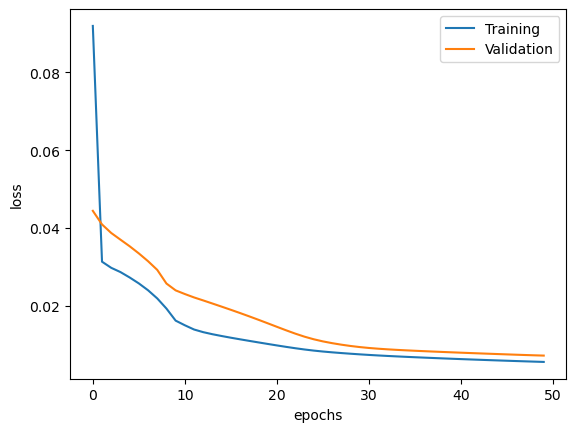

In [52]:
# trianing andd validation loss

plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [53]:
# predict
y_hat = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [54]:
# revert the scaling 
y_hat = np.round(y_scaler.inverse_transform(y_hat), 1)

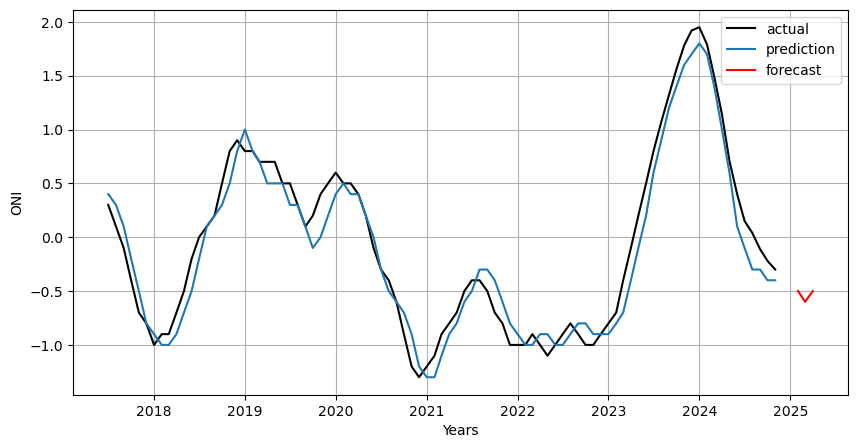

In [55]:
# plot results

# y_test has three columns:
# column 0 = oni values for next month
# column 1 = oni values for the second next month
# column 2 = oni values for the third next month

# plot the oni actual (y_test) and predicted (y_hat) values for the next month
# plot y_hat last row values as the forecast for the next 3 months


# find y_test start row index to get the start of the date range
# add 1 because the values are for the next month
y_start = n_train + n_valid + 1

# oni actual values
y_actual = pd.DataFrame(index = df_reframed.index[y_start:],
                        data = y_scaler.inverse_transform(y_test)[:-1, 0])

# oni predicted values
y_predict = pd.DataFrame(index = df_reframed.index[y_start:],
                         data = y_hat[:-1, 0])

# oni forecast values
last_actual_date = df_enso.index[-1]
forecast_start = last_actual_date + pd.DateOffset(months=1)

# Remove duplicates by ensuring only new dates are added
forecast_dates = pd.date_range(start=forecast_start, periods=n_out, freq='MS')
forecast_dates = forecast_dates[~forecast_dates.isin(df_enso.index)]  # Remove overlap

y_forecast = pd.DataFrame(index=forecast_dates, data=y_hat[-1, :len(forecast_dates)])


plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='actual', color='k')
plt.plot(y_predict, label='prediction')
plt.plot(y_forecast, label='forecast', color='r')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.legend()
plt.grid()
plt.show()

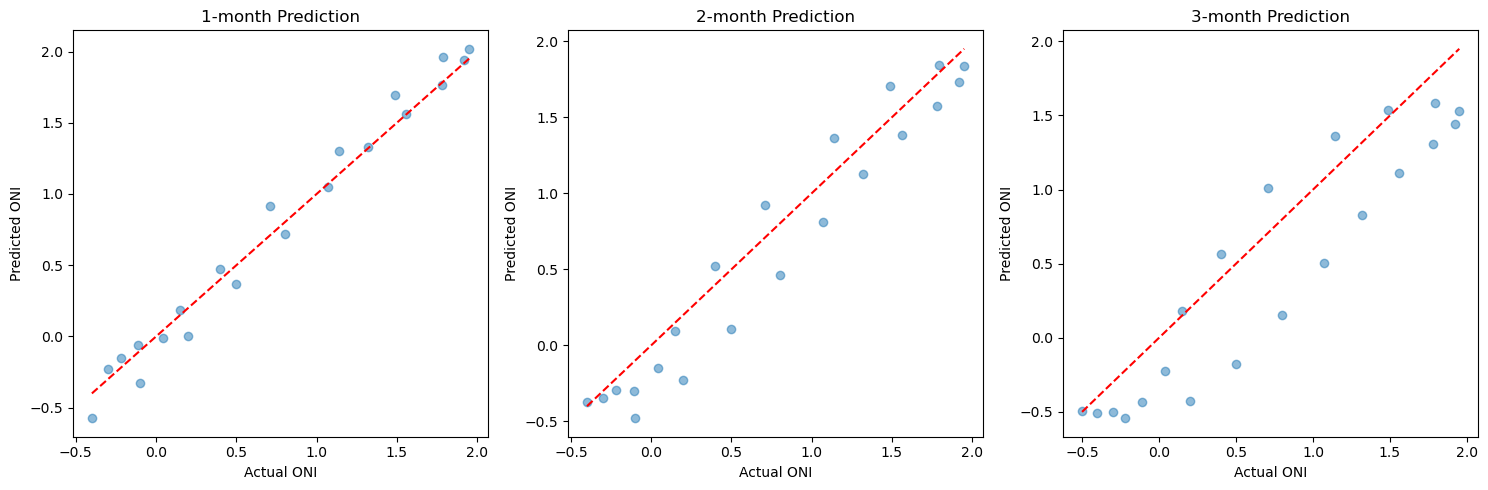


Detailed Accuracy Metrics:

1-month Horizon:
RMSE: 0.122
MAE: 0.097
R² Score: 0.976
Correlation: 0.991
ENSO Phase Accuracy: 90.5%

2-month Horizon:
RMSE: 0.225
MAE: 0.195
R² Score: 0.917
Correlation: 0.972
ENSO Phase Accuracy: 85.7%

3-month Horizon:
RMSE: 0.390
MAE: 0.334
R² Score: 0.767
Correlation: 0.935
ENSO Phase Accuracy: 66.7%

Prediction Confidence Intervals (95%):
1-month: ±0.21
2-month: ±0.32
3-month: ±0.46

Interpretation Guide:
1. RMSE: Lower values indicate better accuracy (in ONI units)
2. MAE: Average absolute prediction error (in ONI units)
3. R² Score: 1.0 is perfect prediction, 0.0 is baseline prediction
4. Correlation: 1.0 is perfect correlation, 0.0 is no correlation
5. ENSO Phase Accuracy: Percentage of correctly predicted phases
6. Confidence Intervals: Range within which 95% of predictions fall


In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats

# Load the data and model
df_enso = pd.read_csv(r"C:\Users\bhanu\OneDrive\Desktop\project\ENSO EVENTS PREDICTION\ENSO.csv", parse_dates=[0])
df_enso.set_index('Date', inplace=True)
model = load_model('model_lstm.keras')

# Parameters
n_in = 12
n_out = 3
n_steps = n_in
n_features = 1

# Create and fit scalers
x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler = MinMaxScaler(feature_range=(0,1))
x_scaler.fit(df_enso['ONI'].values.reshape(-1, 1))
y_scaler.fit(df_enso['ONI'].values.reshape(-1, 1))

# Function for prediction
def predict_next_months(input_data, model, n_steps, n_features):
    scaled_input = x_scaler.transform(input_data.reshape(-1, 1))
    scaled_input = scaled_input.reshape(1, n_steps, n_features)
    prediction = model.predict(scaled_input, verbose=0)
    prediction = y_scaler.inverse_transform(prediction)
    return prediction[0]

# Create validation dataset using historical data
validation_size = 24  # 2 years of monthly data
validation_predictions = []
actual_values = []

for i in range(len(df_enso) - validation_size, len(df_enso) - n_out):
    # Get the input window
    input_window = df_enso['ONI'].values[i-n_in:i]
    # Get actual values
    actual = df_enso['ONI'].values[i:i+n_out]
    # Make prediction
    pred = predict_next_months(input_window, model, n_steps, n_features)
    
    validation_predictions.append(pred)
    actual_values.append(actual)

# Convert to numpy arrays
validation_predictions = np.array(validation_predictions)
actual_values = np.array(actual_values)

# Calculate accuracy metrics for each prediction horizon
horizons = ['1-month', '2-month', '3-month']
metrics = {}

for i in range(n_out):
    pred_horizon = validation_predictions[:, i]
    actual_horizon = actual_values[:, i]
    
    metrics[horizons[i]] = {
        'RMSE': np.sqrt(mean_squared_error(actual_horizon, pred_horizon)),
        'MAE': mean_absolute_error(actual_horizon, pred_horizon),
        'R2': r2_score(actual_horizon, pred_horizon),
        'Correlation': stats.pearsonr(actual_horizon, pred_horizon)[0]
    }

# Calculate ENSO phase prediction accuracy
def get_enso_phase(oni_value):
    if oni_value >= 0.5:
        return 'El Niño'
    elif oni_value <= -0.5:
        return 'La Niña'
    else:
        return 'Neutral'

phase_accuracy = {}
for i in range(n_out):
    actual_phases = [get_enso_phase(x) for x in actual_values[:, i]]
    predicted_phases = [get_enso_phase(x) for x in validation_predictions[:, i]]
    correct_phases = sum(1 for a, p in zip(actual_phases, predicted_phases) if a == p)
    phase_accuracy[horizons[i]] = correct_phases / len(actual_phases) * 100

# Plotting actual vs predicted values for each horizon
plt.figure(figsize=(15, 5))
for i in range(n_out):
    plt.subplot(1, 3, i+1)
    plt.scatter(actual_values[:, i], validation_predictions[:, i], alpha=0.5)
    plt.plot([min(actual_values[:, i]), max(actual_values[:, i])], 
             [min(actual_values[:, i]), max(actual_values[:, i])], 'r--')
    plt.xlabel('Actual ONI')
    plt.ylabel('Predicted ONI')
    plt.title(f'{horizons[i]} Prediction')
plt.tight_layout()
plt.show()

# Print detailed accuracy metrics
print("\nDetailed Accuracy Metrics:")
print("==========================")
for horizon in horizons:
    print(f"\n{horizon} Horizon:")
    print(f"RMSE: {metrics[horizon]['RMSE']:.3f}")
    print(f"MAE: {metrics[horizon]['MAE']:.3f}")
    print(f"R² Score: {metrics[horizon]['R2']:.3f}")
    print(f"Correlation: {metrics[horizon]['Correlation']:.3f}")
    print(f"ENSO Phase Accuracy: {phase_accuracy[horizon]:.1f}%")

# Calculate confidence intervals
confidence_intervals = {}
for i in range(n_out):
    errors = validation_predictions[:, i] - actual_values[:, i]
    confidence_intervals[horizons[i]] = np.percentile(errors, [2.5, 97.5])

print("\nPrediction Confidence Intervals (95%):")
print("====================================")
for horizon in horizons:
    print(f"{horizon}: ±{np.mean(np.abs(confidence_intervals[horizon])):.2f}")

# Print interpretation
print("\nInterpretation Guide:")
print("====================")
print("1. RMSE: Lower values indicate better accuracy (in ONI units)")
print("2. MAE: Average absolute prediction error (in ONI units)")
print("3. R² Score: 1.0 is perfect prediction, 0.0 is baseline prediction")
print("4. Correlation: 1.0 is perfect correlation, 0.0 is no correlation")
print("5. ENSO Phase Accuracy: Percentage of correctly predicted phases")
print("6. Confidence Intervals: Range within which 95% of predictions fall")